In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [4]:
zips = pd.read_csv("All Zip Data.csv")
zips = zips.loc[zips["State"] == "NY"]
zips = zips.groupby("Major City").agg({"Population": "sum", "Population Density": "mean"})

payments = pd.read_csv("Payment_and_value_of_care_-_Hospital_CLEAN.csv")
zips["Major City"] = zips.index


In [5]:

state = payments.loc[payments["State"] == "NY"]

hip = state.loc[state["Value of care display name"] == "Value of Care hip/knee replacement"]

hip["City"] = hip["City"].str.upper()
zips.rename(columns={"Major City": "City"}, inplace=True)
zips["City"] = zips["City"].str.upper()

merge = pd.merge(hip, zips, on="City")
merge["Payment"] = merge["Payment"].str.replace(",", "")
merge["Payment"] = merge["Payment"].str.replace("$", "")
merge["Payment"] = merge["Payment"].astype(int)
byhos = merge.groupby("Hospital name").agg({"Population": "first", "Population Density": "first", "Payment": "mean"})



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


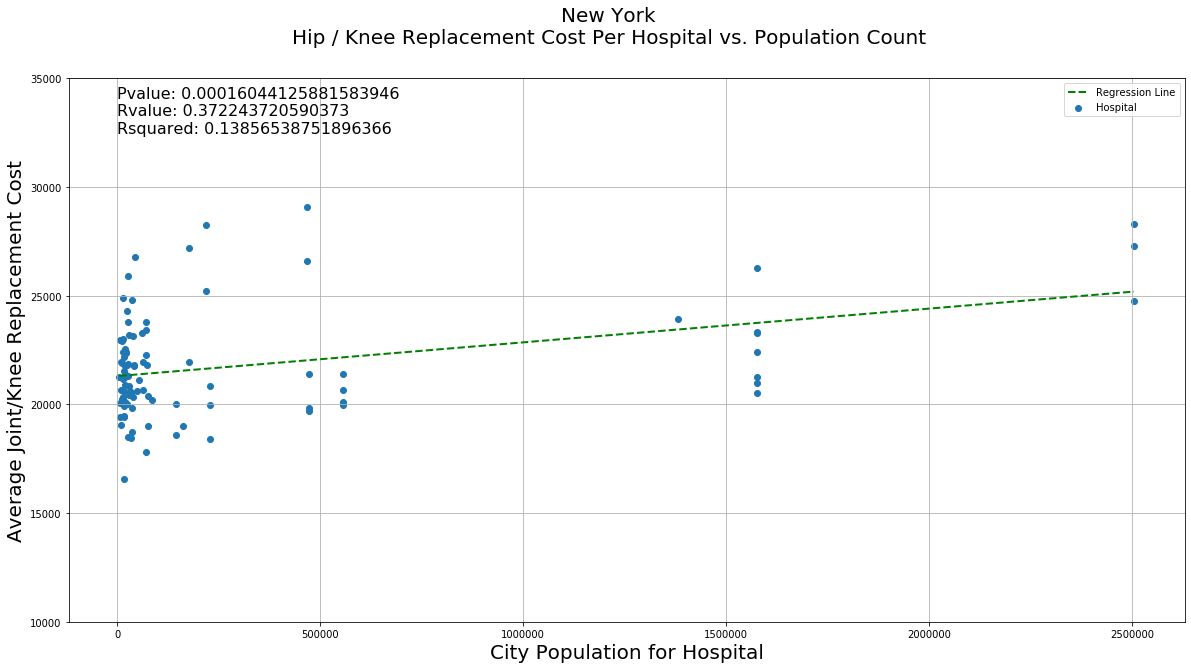

In [6]:
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
slope, inter, rvalue, pvalue, std = stats.linregress(byhos["Population"], byhos["Payment"])
yvals = np.linspace(byhos["Population"].min(), byhos["Population"].max())
fit = slope * yvals + inter
ax.set_ylim(10000, 35000)
ax.scatter(byhos["Population"], byhos["Payment"])
ax.plot(yvals, fit, color="green", linewidth=2, linestyle="--")
ax.legend(["Regression Line", "Hospital"])
fig.suptitle("New York\nHip / Knee Replacement Cost Per Hospital vs. Population Count",fontsize=20)
ax.set_xlabel("City Population for Hospital", fontsize=20)
ax.set_ylabel("Average Joint/Knee Replacement Cost", fontsize=20)
plt.text(0, 32500, "Pvalue: " + str(pvalue) + "\nRvalue: " + str(rvalue) + "\nRsquared: " + str(rvalue**2), fontsize=16)
plt.grid()
fig.savefig("New York population vs payment")